# American Housing Survey (2017) 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("dataset/2017nat_housing_survey1.csv")
data.head()

,CONTROL,YRBUILT,UNITSIZE,NHQSCHOOL,TOTROOMS,NHQSCRIME,LOTSIZE,RATINGHS,RATINGNH,PORCH,BATHROOMS,BEDROOMS,BLD,MARKETVAL,OMB13CBSA
0,11000001,2000,6.0,1.0,8,2.0,2.0,10.0,10.0,1,4,3,2,307811.0,37980
1,11000002,1970,8.0,1.0,7,2.0,7.0,10.0,10.0,1,4,3,3,1005540.0,99998
2,11000005,1970,6.0,1.0,8,2.0,5.0,8.0,8.0,1,5,4,2,229992.0,99998
3,11000006,1980,4.0,1.0,5,2.0,3.0,10.0,10.0,1,3,3,2,132220.0,99998
4,11000007,1960,7.0,2.0,8,2.0,2.0,7.0,7.0,1,4,4,2,271584.0,37980


In [3]:
#Identify how many NaN
#data.info()

In [3]:
data_clean = data.dropna(how='any')

In [4]:
data_clean.head()

,CONTROL,YRBUILT,UNITSIZE,NHQSCHOOL,TOTROOMS,NHQSCRIME,LOTSIZE,RATINGHS,RATINGNH,PORCH,BATHROOMS,BEDROOMS,BLD,MARKETVAL,OMB13CBSA
0,11000001,2000,6.0,1.0,8,2.0,2.0,10.0,10.0,1,4,3,2,307811.0,37980
1,11000002,1970,8.0,1.0,7,2.0,7.0,10.0,10.0,1,4,3,3,1005540.0,99998
2,11000005,1970,6.0,1.0,8,2.0,5.0,8.0,8.0,1,5,4,2,229992.0,99998
3,11000006,1980,4.0,1.0,5,2.0,3.0,10.0,10.0,1,3,3,2,132220.0,99998
4,11000007,1960,7.0,2.0,8,2.0,2.0,7.0,7.0,1,4,4,2,271584.0,37980


In [5]:
#Export CSV file without Pandas index, include header
data_clean.to_csv("dataset/data_clean.csv", index=False, header=True)

In [6]:
#data.dtypes

In [7]:
#data_clean.info()

In [6]:
newDF= data_clean[['CONTROL', 'OMB13CBSA', 'MARKETVAL', 'TOTROOMS', 'YRBUILT', 'UNITSIZE', 'BEDROOMS', 'BATHROOMS', 'BLD', 'NHQSCHOOL', 'NHQSCRIME', 'RATINGNH']]
newDF.head()

,CONTROL,OMB13CBSA,MARKETVAL,TOTROOMS,YRBUILT,UNITSIZE,BEDROOMS,BATHROOMS,BLD,NHQSCHOOL,NHQSCRIME,RATINGNH
0,11000001,37980,307811.0,8,2000,6.0,3,4,2,1.0,2.0,10.0
1,11000002,99998,1005540.0,7,1970,8.0,3,4,3,1.0,2.0,10.0
2,11000005,99998,229992.0,8,1970,6.0,4,5,2,1.0,2.0,8.0
3,11000006,99998,132220.0,5,1980,4.0,3,3,2,1.0,2.0,10.0
4,11000007,37980,271584.0,8,1960,7.0,4,4,2,2.0,2.0,7.0


In [8]:
m = newDF["MARKETVAL"]
t = newDF["TOTROOMS"]

In [9]:
y = m.values.reshape(-1, 1)
X = t.values.reshape(-1,1)

In [10]:
print("Shape: ", X.shape, y.shape)

Shape:  (27095, 1) (27095, 1)


In [13]:
from sklearn.covariance import EllipticEnvelope

outlier = EllipticEnvelope(contamination=0.1)
outlier.fit(X)
prediction1 = outlier.predict(X)

In [8]:
feature = newDF.iloc[:, [2, 3]].values
feature

array([[3.07811e+05, 8.00000e+00],
       [1.00554e+06, 7.00000e+00],
       [2.29992e+05, 8.00000e+00],
       ...,
       [3.07518e+05, 5.00000e+00],
       [3.93286e+05, 7.00000e+00],
       [9.90315e+05, 8.00000e+00]])

In [9]:
from sklearn.covariance import EllipticEnvelope
outlier1 = EllipticEnvelope(contamination=0.1)
outlier1.fit(feature)
prediction2 = outlier1.predict(feature)

c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (22.625542043123907 > 22.459305913022487)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (22.704977602754468 > 22.554896689975390)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (22.724518932926781 > 22.566096976638818)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (22.772319798533761 > 22.612677206768279)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\rob

c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (22.945266275531644 > 22.823094350335911)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (22.953031428389462 > 22.833502093481663)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (22.766260912315264 > 22.590913602029005)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (22.797800736284010 > 22.602851744491282)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\rob

c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (22.674907162357314 > 22.530026270408193)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (22.802714111491376 > 22.633948274838012)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (22.807509900837886 > 22.642277981479193)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (22.811198689965320 > 22.654490844991138)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\rob

c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (23.003139956935655 > 22.858131643989118)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (22.548833495315957 > 22.346892311763483)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (22.724518932926781 > 22.549194414072332)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (22.773742342837455 > 22.583179974280874)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\rob

c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (22.602958314408141 > 22.422385439874475)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (22.612161188644386 > 22.443404685024273)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (22.880078993858039 > 22.715367928512922)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (22.909521509522232 > 22.751827485127688)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\rob

c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (22.753441201457740 > 22.599488884700136)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (22.918803352730521 > 22.770987448754422)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (22.918803352730521 > 22.781597050087989)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (22.698396059556231 > 22.502160161725630)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\rob

c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (23.018082405204485 > 22.895315575095648)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (23.039910288084105 > 22.912221191969390)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (23.097691902600594 > 23.003538937904032)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (22.938638673355879 > 22.786601683630849)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\rob

c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (22.525828587780580 > 22.199598514635749)
  % (det, previous_det), RuntimeWarning)
c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [10]:
newDF['outliers'] = prediction2

c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
newDF[newDF['outliers'] == -1].count()

CONTROL      2710
OMB13CBSA    2710
MARKETVAL    2710
TOTROOMS     2710
YRBUILT      2710
UNITSIZE     2710
BEDROOMS     2710
BATHROOMS    2710
BLD          2710
NHQSCHOOL    2710
NHQSCRIME    2710
RATINGNH     2710
outliers     2710
dtype: int64

In [12]:
newDF[newDF['outliers'] != -1].count()

CONTROL      24385
OMB13CBSA    24385
MARKETVAL    24385
TOTROOMS     24385
YRBUILT      24385
UNITSIZE     24385
BEDROOMS     24385
BATHROOMS    24385
BLD          24385
NHQSCHOOL    24385
NHQSCRIME    24385
RATINGNH     24385
outliers     24385
dtype: int64

In [13]:
newDF_in = newDF.loc[(
    newDF['outliers'] == 1)]
newDF_in.head()

,CONTROL,OMB13CBSA,MARKETVAL,TOTROOMS,YRBUILT,UNITSIZE,BEDROOMS,BATHROOMS,BLD,NHQSCHOOL,NHQSCRIME,RATINGNH,outliers
0,11000001,37980,307811.0,8,2000,6.0,3,4,2,1.0,2.0,10.0,1
2,11000005,99998,229992.0,8,1970,6.0,4,5,2,1.0,2.0,8.0,1
3,11000006,99998,132220.0,5,1980,4.0,3,3,2,1.0,2.0,10.0,1
4,11000007,37980,271584.0,8,1960,7.0,4,4,2,2.0,2.0,7.0,1
9,11000013,37980,573123.0,8,1980,8.0,3,4,2,1.0,2.0,8.0,1


In [14]:
#Export CSV file without Pandas index, include header
newDF_in.to_csv("dataset/data_cleanOutliers.csv", index=False, header=True)

# Linear Regression

## Market Value & Total Rooms

In [19]:
y = newDF_in["MARKETVAL"].values.reshape(-1, 1)
X = newDF_in["TOTROOMS"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)


Shape:  (24385, 1) (24385, 1)


In [20]:
print(X, y)

[[8]
 [8]
 [5]
 ...
 [7]
 [5]
 [7]] [[307811.]
 [229992.]
 [132220.]
 ...
 [590394.]
 [307518.]
 [393286.]]


In [21]:
#data_clean.head()

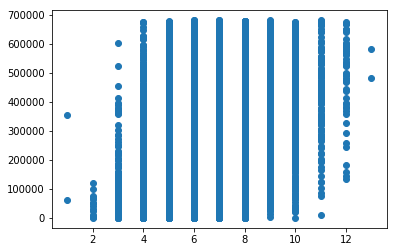

In [22]:
plt.scatter(X, y)

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [24]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
#R2 score
score = model.score(X, y)
print(score)
# 18% of our data fits within the model

0.17785477261956206


In [26]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept :', model.intercept_)

Weight coefficients:  [[44347.00411701]]
y-axis intercept : [-40936.44096492]


In [27]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1]]
Max X Value: [[13]]


In [28]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

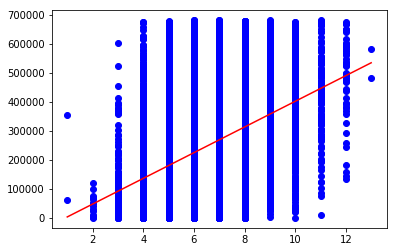

In [29]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

## Market Value & Year Built

In [30]:
# Determine if market value and year built are correlated 
y = newDF_in["MARKETVAL"].values.reshape(-1, 1)
X = newDF_in["YRBUILT"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)


Shape:  (24385, 1) (24385, 1)


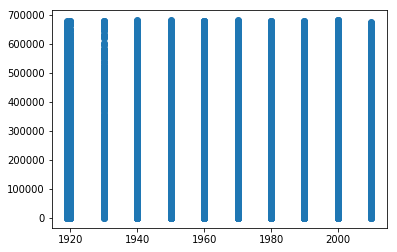

In [31]:
plt.scatter(X, y)

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [33]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
#R2 score
score = model.score(X, y)
print(score)
#2% of data fits our model

0.017932296420225424


In [35]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept :', model.intercept_)

Weight coefficients:  [[861.84430599]]
y-axis intercept : [-1451533.02363114]


In [36]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1919]]
Max X Value: [[2010]]


In [37]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

In [38]:
print(f"Min y Value: {y_min}")
print(f"Max y Value: {y_max}")

Min y Value: [[202346.19955802]]
Max y Value: [[280774.03140284]]


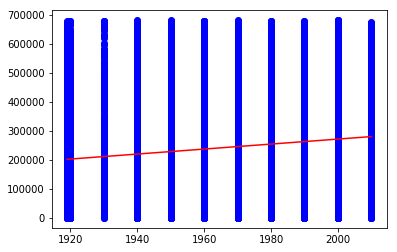

In [39]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

## Market Value & Unit Size

In [40]:
# Determine if market value and unit size are correlated 
y = newDF_in["MARKETVAL"].values.reshape(-1, 1)
X = newDF_in["UNITSIZE"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (24385, 1) (24385, 1)


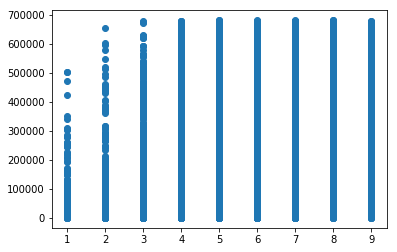

In [41]:
plt.scatter(X, y)

In [42]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [43]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
#R2 score
score = model.score(X, y)
print(score)
#20% of our data fits within the model

0.19719147648736124


In [45]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept :', model.intercept_)

Weight coefficients:  [[43901.7618627]]
y-axis intercept : [8129.37272107]


In [46]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1.]]
Max X Value: [[9.]]


In [47]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

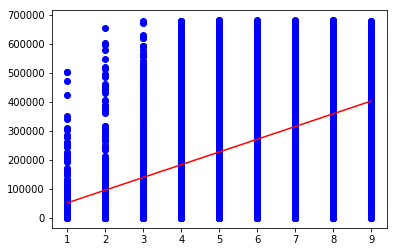

In [48]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

## Market Value & Building Type

In [49]:
# Determine if market value and building type are correlated 
y = newDF_in["MARKETVAL"].values.reshape(-1, 1)
X = newDF_in["BLD"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (24385, 1) (24385, 1)


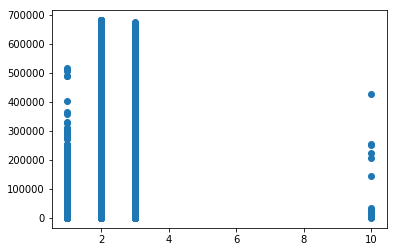

In [50]:
plt.scatter(X, y)

In [51]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [52]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
#R2 score
score = model.score(X, y)
print(score)
# 4% of our data fits within the model

0.03702299687668864


In [54]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept :', model.intercept_)

Weight coefficients:  [[75608.38085376]]
y-axis intercept : [97941.41307689]


In [55]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1]]
Max X Value: [[10]]


In [56]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

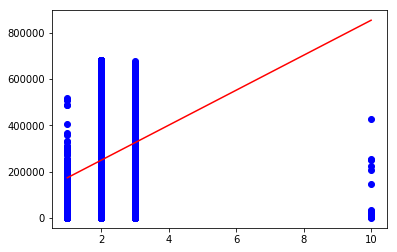

In [57]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

## Market Value & Neighborhood 

In [77]:
# Determine if market value and neighborhood rating are correlated 
#y = newDF_in["MARKETVAL"].values.reshape(-1, 1)
#X = newDF_in["RATINGNH"].values.reshape(-1, 1)

#print("Shape: ", X.shape, y.shape)

In [ ]:
#plt.scatter(X, y)

In [ ]:
#from sklearn.linear_model import LinearRegression
#model = LinearRegression()

In [ ]:
#model.fit(X, y)

In [ ]:
#R2 score
#score = model.score(X, y)
#print(score)
# of our data fits within the model

In [ ]:
#print('Weight coefficients: ', model.coef_)
#print('y-axis intercept :', model.intercept_)

In [ ]:
#x_min = np.array([[X.min()]])
#x_max = np.array([[X.max()]])
#print(f"Min X Value: {x_min}")
#print(f"Max X Value: {x_max}")

In [ ]:
#y_min = model.predict(x_min)
#y_max = model.predict(x_max)

In [ ]:
#plt.scatter(X, y, c='blue')
#plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

## Market Value & Bedrooms

In [59]:
# Determine if market value and neighborhood rating are correlated 
y = newDF_in["MARKETVAL"].values.reshape(-1, 1)
X = newDF_in["BEDROOMS"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (24385, 1) (24385, 1)


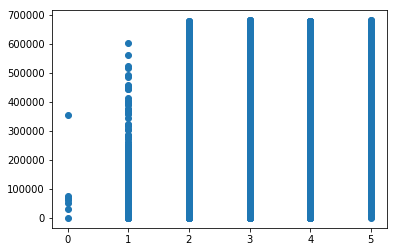

In [60]:
plt.scatter(X, y)

In [61]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [62]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
#R2 score
score = model.score(X, y)
print(score)
# 12% of our data fits within the model

0.11858676073312759


In [64]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept :', model.intercept_)

Weight coefficients:  [[66588.77341751]]
y-axis intercept : [30840.55170534]


In [65]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0]]
Max X Value: [[5]]


In [66]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

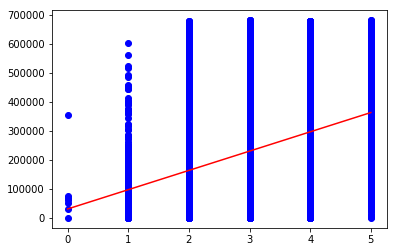

In [67]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

## Market Value & Bathrooms

In [68]:
# Determine if market value and neighborhood rating are correlated 
y = newDF_in["MARKETVAL"].values.reshape(-1, 1)
X = newDF_in["BATHROOMS"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (24385, 1) (24385, 1)


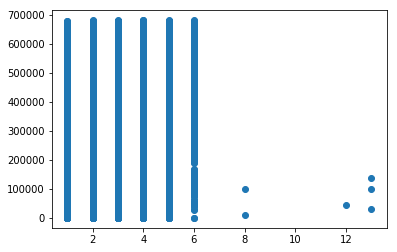

In [69]:
plt.scatter(X, y)

In [70]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [71]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
#R2 score
score = model.score(X, y)
print(score)
# 19% of our data fits within the model

0.18986694987742636


In [73]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept :', model.intercept_)

Weight coefficients:  [[52644.24611689]]
y-axis intercept : [81799.26782248]


In [74]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1]]
Max X Value: [[13]]


In [75]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

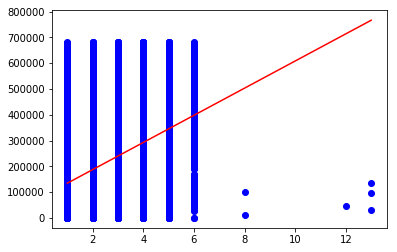

In [76]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')